In [6]:
import pandas as pd
import numpy as np 

import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn

In [7]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [8]:
titanic=pd.read_csv(r'D:\donna-santos\Langara College Class\CPSC\Assignment3\titanic.csv')

titanic.head()    #Checking the variables

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.isnull()   #Checking if there are null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:title={'center':'Heatmap of Titanic Data'}>

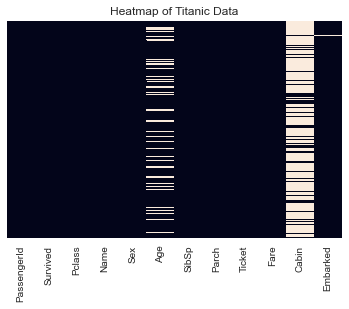

In [12]:
plt.title('Heatmap of Titanic Data')
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='rocket')

<AxesSubplot:xlabel='Sex', ylabel='count'>

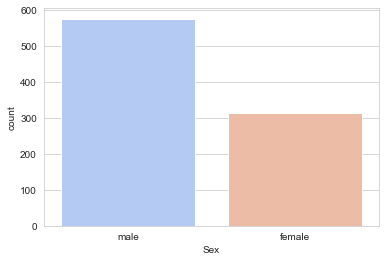

In [13]:
#DATA OBSERVATION - SEX
sns.countplot(x='Sex', data=titanic, palette='coolwarm')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

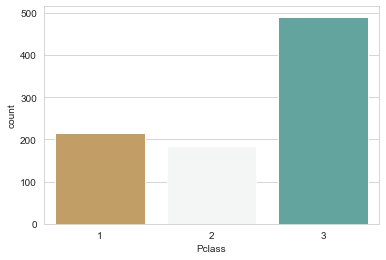

In [14]:
#DATA OBSERVATION - SEX
sns.countplot(x='Pclass', data=titanic, palette='BrBG')

<AxesSubplot:xlabel='Survived', ylabel='count'>

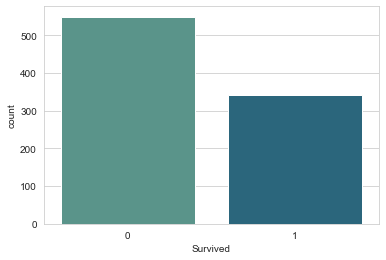

In [15]:
#DATA OBSERVATION - SEX
sns.countplot(x='Survived', data=titanic, palette='crest')

C:\Users\donna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Age')

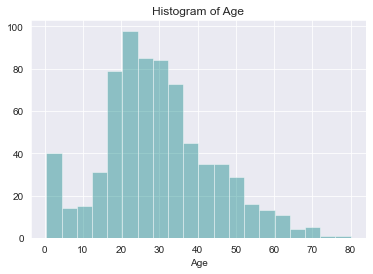

In [16]:
sns.set_style('darkgrid')
sns.distplot(titanic['Age'].dropna(),kde=False,color='teal',bins=20)
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Count of Sibsp')

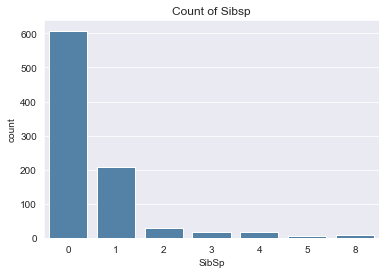

In [17]:
sns.countplot(x='SibSp', data=titanic, color='steelblue')
plt.title('Count of Sibsp')

Text(0.5, 1.0, 'Histogram of Fare')

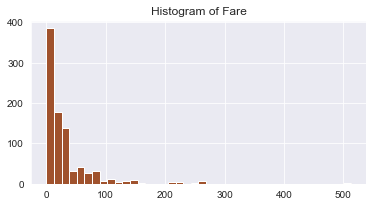

In [18]:
sns.set_style('darkgrid')
titanic['Fare'].hist(color='sienna',bins=40,figsize=(6,3))
plt.title('Histogram of Fare')

<AxesSubplot:title={'center':'Scatterplot of No. of Passenger Survived and Passenger Class'}, xlabel='Pclass', ylabel='Age'>

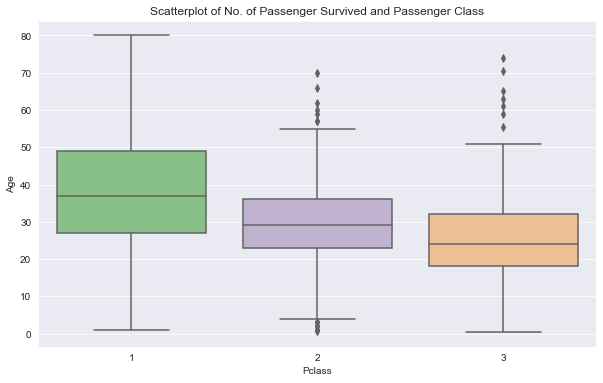

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.title('Scatterplot of No. of Passenger Survived and Passenger Class')
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='Accent')

In [20]:
def replace_age(i):
    Age=i[0]
    Pclass=i[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [21]:
titanic['Age']=titanic[['Age','Pclass']].apply(replace_age,axis=1)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
#drop Cabin as there are too many null values
titanic.drop('Cabin',axis=1,inplace=True)

In [25]:
titanic.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<AxesSubplot:>

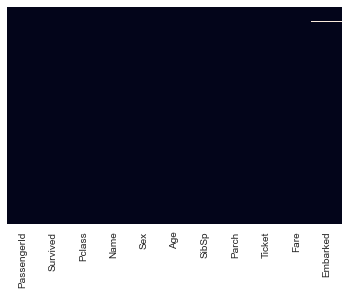

In [26]:
#checking for the null values replacement
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [27]:
pd.get_dummies(titanic['Embarked'],drop_first=False).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
sex_rev=pd.get_dummies(titanic['Sex'],drop_first=True)
embarked_rev=pd.get_dummies(titanic['Embarked'],drop_first=False)

In [29]:
titanic.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)

In [30]:
titanic.drop(['Sex'],axis=1,inplace=True)

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
titanic = pd.concat([titanic,sex_rev,embarked_rev],axis=1)

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [34]:
titanic.drop(['Survived'],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [35]:
titanic['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

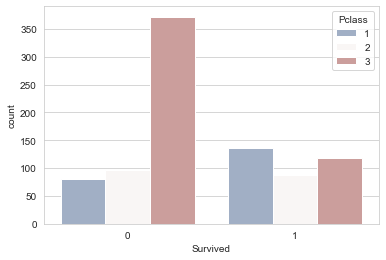

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='vlag')

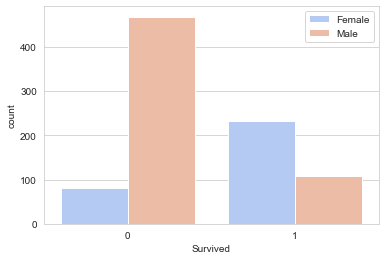

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='male', data=titanic, palette='coolwarm')
L=plt.legend()
L.get_texts()[0].set_text('Female')
L.get_texts()[1].set_text('Male')

In [38]:
#PClass and Survived Correlation
scipy.stats.pearsonr(titanic['Pclass'],titanic['Survived'])[0]

-0.3384810359610166

In [39]:
scipy.stats.spearmanr(titanic['Pclass'], titanic['Survived'])[0]

-0.33966793665005257

In [40]:
titanic['Pclass'].corr(titanic['Survived'])

-0.3384810359610149

In [41]:
#Age and Survived Correlation
scipy.stats.pearsonr(titanic['Age'],titanic['Survived'])[0]

-0.04725460657863689

In [42]:
scipy.stats.spearmanr(titanic['Age'], titanic['Survived'])[0]

-0.015143647185970227

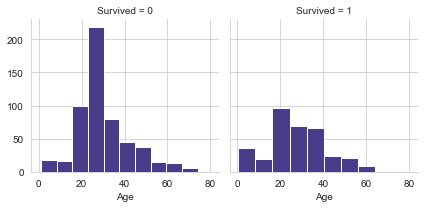

In [44]:
sns.set_style('whitegrid')
ageChart = sns.FacetGrid(titanic, col = 'Survived')
ageChart.map(plt.hist, 'Age', bins = 10, color='darkslateblue')

Text(0.5, 1.0, 'Boxplot of Age, Sex and Survived')

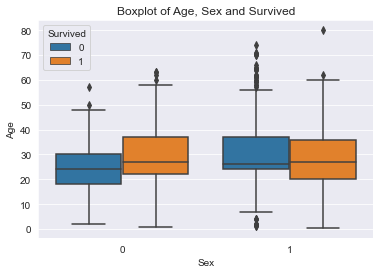

In [54]:
sns.set_style('darkgrid')
sns.boxplot(x="male", y='Age', hue='Survived', data=titanic)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Boxplot of Age, Sex and Survived')

Text(0.5, 1.0, 'Boxplot of Age, Passenger Class and Survived')

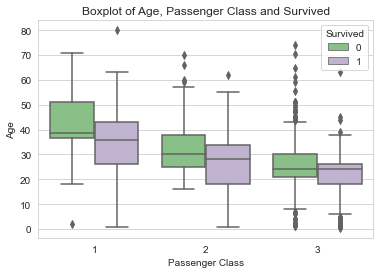

In [65]:
sns.set_style('whitegrid')
sns.boxplot(x="Pclass", y='Age', hue='Survived', data=titanic, palette='Accent')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Boxplot of Age, Passenger Class and Survived')

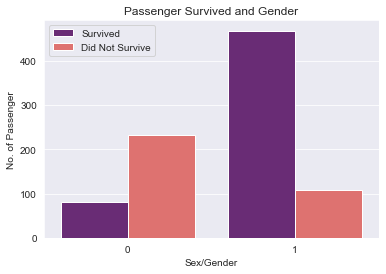

In [108]:
j= sns.set_style('darkgrid')
j=sns.countplot(x='male', hue='Survived', data=titanic, palette='magma')
j.set_ylabel('No. of Passenger')
j.set_xlabel('Sex/Gender')
j.set(title='Passenger Survived and Gender')
plt.legend(loc=1)
H = plt.legend()
H.get_texts()[1].set_text('Did Not Survive')
H.get_texts()[0].set_text('Survived')

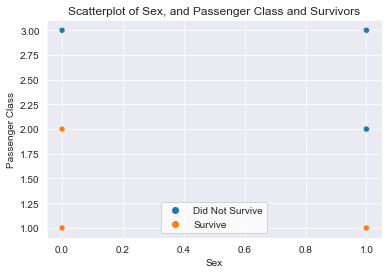

In [113]:
sns.set_style('darkgrid')
sns.scatterplot(x="male", y="Pclass", hue='Survived', data=titanic, color='indigo')
sns.set_style('whitegrid')
plt.title('Scatterplot of Sex, and Passenger Class and Survivors')
plt.xlabel('Sex')
plt.ylabel('Passenger Class')
K = plt.legend()
K.get_texts()[1].set_text('Survive')
K.get_texts()[0].set_text('Did Not Survive')

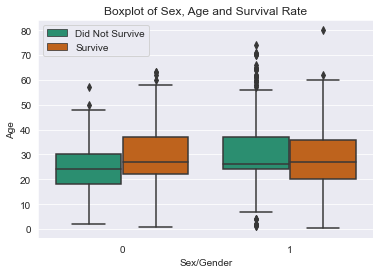

In [114]:
sns.set_style('darkgrid')
plt.title('Boxplot of Sex, Age and Survival Rate')

sns.boxplot(x="male", y="Age", hue='Survived', data=titanic, palette='Dark2')
plt.xlabel('Sex/Gender')
plt.ylabel('Age')
N = plt.legend()
N.get_texts()[1].set_text('Survive')
N.get_texts()[0].set_text('Did Not Survive')

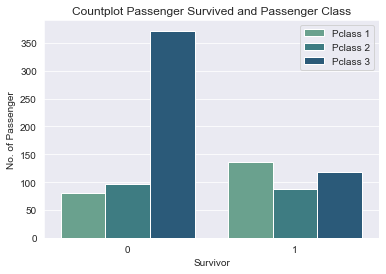

In [116]:
j= sns.set_style('darkgrid')
j=sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='crest')
j.set_ylabel('No. of Passenger')
j.set_xlabel('Survivor')
j.set(title='Countplot Passenger Survived and Passenger Class')
plt.legend(loc=1)
O = plt.legend()
O.get_texts()[0].set_text('Pclass 1')
O.get_texts()[1].set_text('Pclass 2')
O.get_texts()[2].set_text('Pclass 3')

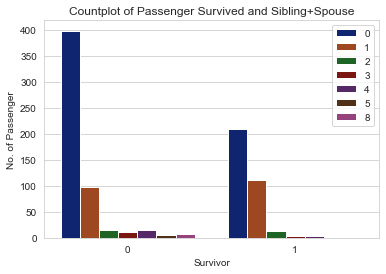

In [109]:
h= sns.set_style('whitegrid')
h=sns.countplot(x='Survived', hue='SibSp', data=titanic, palette='dark')
h.set_ylabel('No. of Passenger')
h.set_xlabel('Survivor')
h.set(title='Countplot of Passenger Survived and Sibling+Spouse')
plt.legend(loc=1)

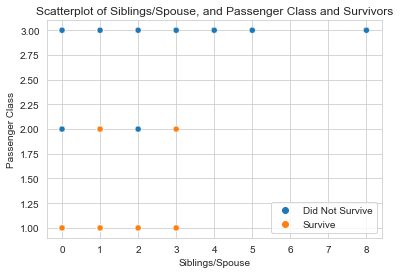

In [122]:
sns.set_style('whitegrid')
sns.scatterplot(x="SibSp", y="Pclass", hue='Survived', data=titanic)
sns.set_style('whitegrid')
plt.title('Scatterplot of Siblings/Spouse, and Passenger Class and Survivors')
plt.xlabel('Siblings/Spouse')
plt.ylabel('Passenger Class')
K = plt.legend()
K.get_texts()[1].set_text('Survive')
K.get_texts()[0].set_text('Did Not Survive')

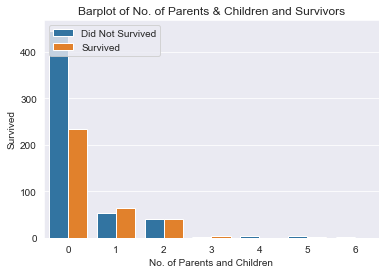

In [119]:
sns.set_style('darkgrid')
sns.countplot(x="Parch", hue='Survived', data=titanic)
plt.xlabel('No. of Parents and Children')
plt.ylabel('Survived')
plt.title('Barplot of No. of Parents & Children and Survivors')
P = plt.legend()
P.get_texts()[0].set_text('Did Not Survived')
P.get_texts()[1].set_text('Survived')

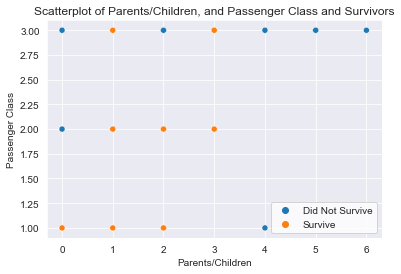

In [120]:
sns.set_style('darkgrid')
sns.scatterplot(x="Parch", y="Pclass", hue='Survived', data=titanic, color='midnightblue')
sns.set_style('whitegrid')
plt.title('Scatterplot of Parents/Children, and Passenger Class and Survivors')
plt.xlabel('Parents/Children')
plt.ylabel('Passenger Class')
K = plt.legend()
K.get_texts()[1].set_text('Survive')
K.get_texts()[0].set_text('Did Not Survive')

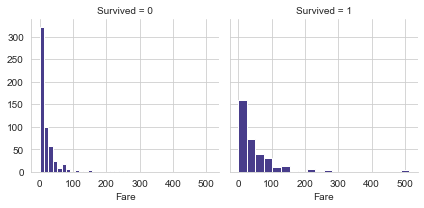

In [112]:
sns.set_style('whitegrid')
fareChart = sns.FacetGrid(titanic, col = 'Survived')
fareChart.map(plt.hist, 'Fare', bins = 20, color='darkslateblue')